In this project, you are going to work on the Census Income dataset from the
UCI Machine Learning Repository that contains the income information for over
48,000 individuals taken from the 1994 US census.
For more details about this dataset, you can refer to the following link:
https://archive.ics.uci.edu/ml/datasets/census+income


Problem Statement:
In this project, initially you need to preprocess the data and then develop an
understanding of the different features of the data by performing exploratory
analysis and creating visualizations. Further, after having sufficient knowledge
about the attributes, you will perform a predictive task of classification to predict
whether an individual makes over 50,000 a year or less by using different
machine learning algorithms.


Tasks To Be Performed:
1. Perform Exploratory Data Analysis to find key insights.
2. Use various machine learning algorithms to predict the response variable.

In [2]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('census-income (7).csv', na_values='?',skipinitialspace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Unnamed: 14       object
dtype: object

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Unnamed: 14'],
      dtype='object')

In [7]:
df.rename(columns= {'Unnamed: 14':'salary'}, inplace = True)

In [8]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [11]:
df['workclass'].fillna(df['workclass'].mode().iloc[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode().iloc[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode().iloc[0], inplace=True)


In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [13]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [14]:
df.drop_duplicates(inplace= True)

In [15]:
df.duplicated().sum() 

0

In [16]:
#data visualisation

<Axes: >

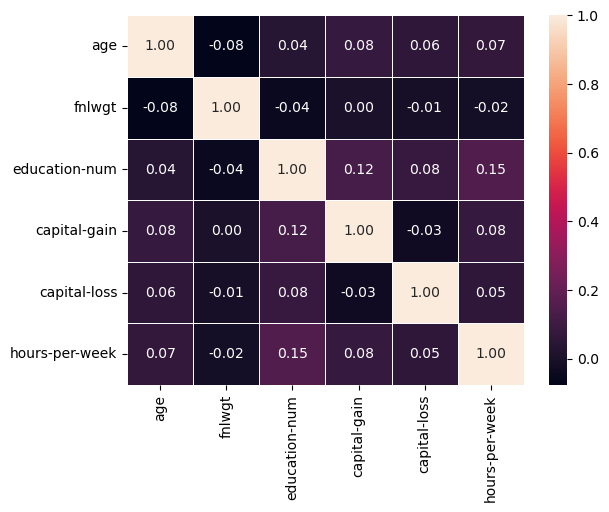

In [17]:
sns.heatmap(df.corr(), annot=True,            
    fmt=".2f",              
    linewidths=0.5,         
    linecolor='white',      
    cbar=True)

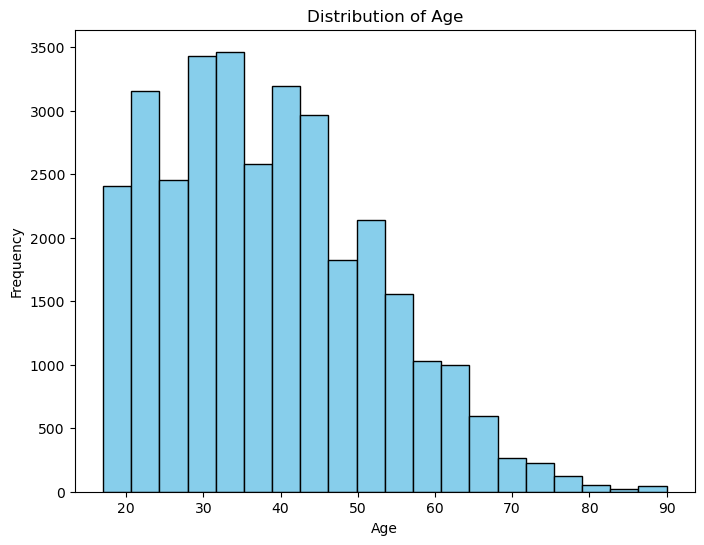

In [18]:
#Histogram of Age
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()



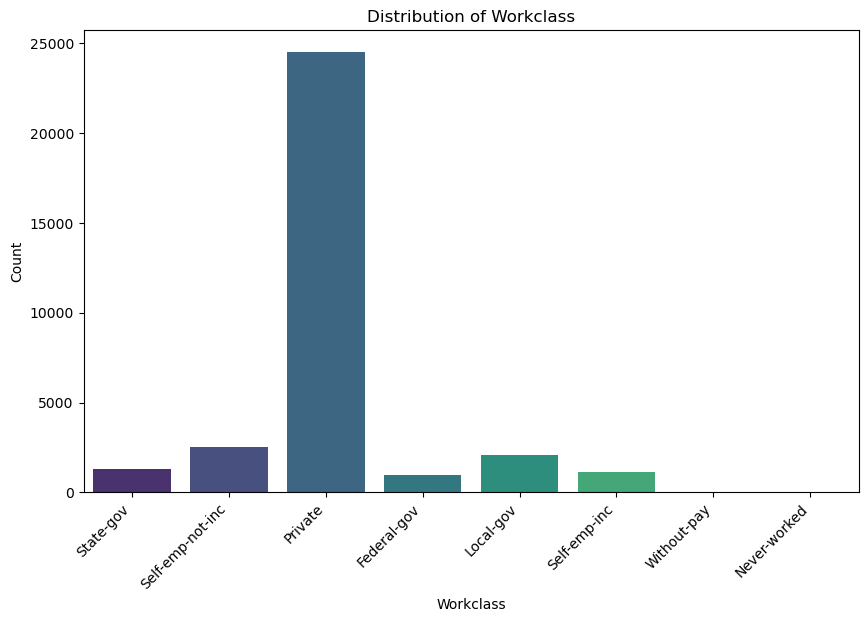

In [19]:
# Bar Plot of Workclass
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')
plt.show()



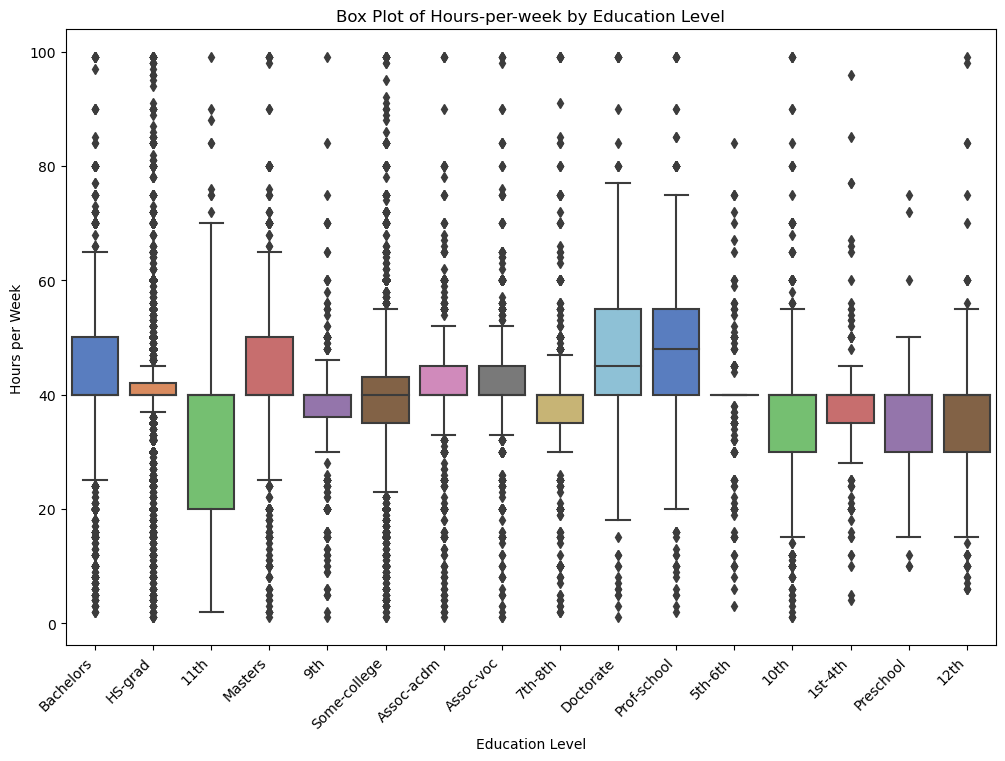

In [20]:
#Box Plot of Hours-per-week by Education Level
plt.figure(figsize=(12, 8))
sns.boxplot(x='education', y='hours-per-week', data=df, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education Level')
plt.ylabel('Hours per Week')
plt.title('Box Plot of Hours-per-week by Education Level')
plt.show()

<Axes: xlabel='hours-per-week', ylabel='Density'>

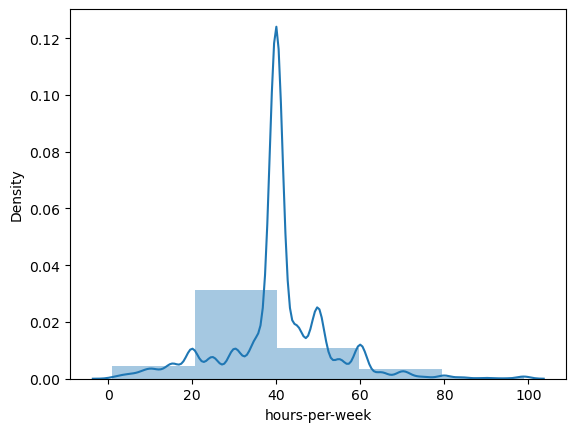

In [21]:
sns.distplot(df['hours-per-week'], bins=5, kde = True)

In [22]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [23]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=le.fit_transform(df[i])

In [ ]:
#feature selection

In [27]:
X=df.drop('salary', axis=1)
y= df['salary']


In [32]:
#feature scaling using the standardscalar
from sklearn.preprocessing import StandardScaler
#scaling the data
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


In [28]:
from sklearn.model_selection import train_test_split


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=29)

### Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lrg= lr.predict(X_test)
y_pred_lrg

array([0, 0, 0, ..., 0, 1, 0])

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr= lr.predict(X_test)
y_pred_lr

array([0, 0, 0, ..., 0, 1, 0])

### Desicion Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
y_pred_dt

array([0, 0, 1, ..., 0, 0, 1])

### RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 45,max_depth=3,n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf 

array([0, 0, 0, ..., 0, 0, 0])

### Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)
y_pred_rfr

### Bagging Algorithm -Extra Trees


In [55]:
from sklearn.ensemble import ExtraTreesClassifier 
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train,y_train)
y_pred_et= et.predict(X_test)
y_pred_et

array([0, 0, 0, ..., 0, 0, 0])

### Bagging Algorithm-Bagging Classifier


In [56]:
from sklearn.ensemble import BaggingClassifier 
bg = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
bg.fit(X_train,y_train).score(X_test,y_test)
y_pred_bg= bg.predict(X_test)
y_pred_bg

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score

### confusion_matrix

In [75]:
print('linear regression has\n', confusion_matrix(y_test,y_pred_lrg))
print()
print('logistic regression has\n', confusion_matrix(y_test,y_pred_lr))
print()
print('decision tree has\n', confusion_matrix(y_test,y_pred_dt))
print()
print('random forest has\n', confusion_matrix(y_test,y_pred_rf))
print()
print('ectra tree has\n', confusion_matrix(y_test,y_pred_et))
print()
print('bagging classifier has\n', confusion_matrix(y_test,y_pred_bg))
print()

linear regression has
 [[7055  429]
 [1277 1001]]

logistic regression has
 [[7055  429]
 [1277 1001]]

decision tree has
 [[6491  993]
 [ 914 1364]]

random forest has
 [[7355  129]
 [1519  759]]

ectra tree has
 [[6854  630]
 [ 904 1374]]

bagging classifier has
 [[6938  546]
 [ 869 1409]]



### accuracy_score

In [71]:
print('linear regression has', accuracy_score(y_test,y_pred_lrg))
print()
print('logistic regression has', accuracy_score(y_test,y_pred_lr))
print()
print('decision tree has', accuracy_score(y_test,y_pred_dt))
print()
print('random forest has', accuracy_score(y_test,y_pred_rf))
print()
print('ectra tree has', accuracy_score(y_test,y_pred_et))
print()
print('bagging classifier has', accuracy_score(y_test,y_pred_bg))
print()

linear regression has 0.8252407293587379

logistic regression has 0.8252407293587379

decision tree has 0.8046506863347674

random forest has 0.8311821348084409

ectra tree has 0.842860069657857

bagging classifier has 0.8550501946322475



### classification_report

In [77]:
print('linear regression has\n', classification_report(y_test,y_pred_lrg))
print()
print('logistic regression has\n', classification_report(y_test,y_pred_lr))
print()
print('decision tree has\n', classification_report(y_test,y_pred_dt))
print()
print('random forest has\n', classification_report(y_test,y_pred_rf))
print()
print('ectra tree has\n', classification_report(y_test,y_pred_et))
print()
print('bagging classifier has\n', classification_report(y_test,y_pred_bg))
print()

linear regression has
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7484
           1       0.70      0.44      0.54      2278

    accuracy                           0.83      9762
   macro avg       0.77      0.69      0.72      9762
weighted avg       0.81      0.83      0.81      9762


logistic regression has
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7484
           1       0.70      0.44      0.54      2278

    accuracy                           0.83      9762
   macro avg       0.77      0.69      0.72      9762
weighted avg       0.81      0.83      0.81      9762


decision tree has
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      7484
           1       0.58      0.60      0.59      2278

    accuracy                           0.80      9762
   macro avg       0.73      0.73      0.73      9762
weigh

### precision_score

In [78]:
print('linear regression has\n', precision_score(y_test,y_pred_lrg))
print()
print('logistic regression has\n', precision_score(y_test,y_pred_lr))
print()
print('decision tree has\n', precision_score(y_test,y_pred_dt))
print()
print('random forest has\n', precision_score(y_test,y_pred_rf))
print()
print('ectra tree has\n', precision_score(y_test,y_pred_et))
print()
print('bagging classifier has\n', precision_score(y_test,y_pred_bg))
print()

linear regression has
 0.7

logistic regression has
 0.7

decision tree has
 0.5787017394993635

random forest has
 0.8547297297297297

ectra tree has
 0.6856287425149701

bagging classifier has
 0.7207161125319693



### recall_score

In [79]:
print('linear regression has\n', recall_score(y_test,y_pred_lrg))
print()
print('logistic regression has\n', recall_score(y_test,y_pred_lr))
print()
print('decision tree has\n', recall_score(y_test,y_pred_dt))
print()
print('random forest has\n', recall_score(y_test,y_pred_rf))
print()
print('ectra tree has\n', recall_score(y_test,y_pred_et))
print()
print('bagging classifier has\n', recall_score(y_test,y_pred_bg))
print()

linear regression has
 0.43942054433713784

logistic regression has
 0.43942054433713784

decision tree has
 0.5987708516242318

random forest has
 0.33318700614574187

ectra tree has
 0.6031606672519754

bagging classifier has
 0.6185250219490781



Final output:

It has been found that finally extra tree classifier has been teh best model with the accuracy of 85%